# <center> Lab 2.1 (Ships)

## Imports and warnings ignores

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## File checking

In [3]:
path = '/Users/valerikanasha228/Downloads/archive/Cleaned_ships_data.csv'
def check_file_path(path):
    res = True
    if not path.endswith('.csv'):
        print('ERROR: Wrong file extension (only .csv allowed)!')
        res = False
    if not os.path.exists(path):
        print('ERROR: file not found!')
        res = False
    else:
        if os.path.getsize(path) == 0:
            print('ERROR: file is empty!')
            res = False
    return res
            
def check_cell_values(data):
    res = True
    if data.isnull().values.any():
        print('Some cell values are empty!')
        res = False
    return res
        
is_file_correct = check_file_path(path)

## Reading a data

In [4]:
if not is_file_correct:
    print("ERROR: file can't be read")
else:
    data = pd.read_csv(path)
    is_cell_values_correct = check_cell_values(data)

# Task 1

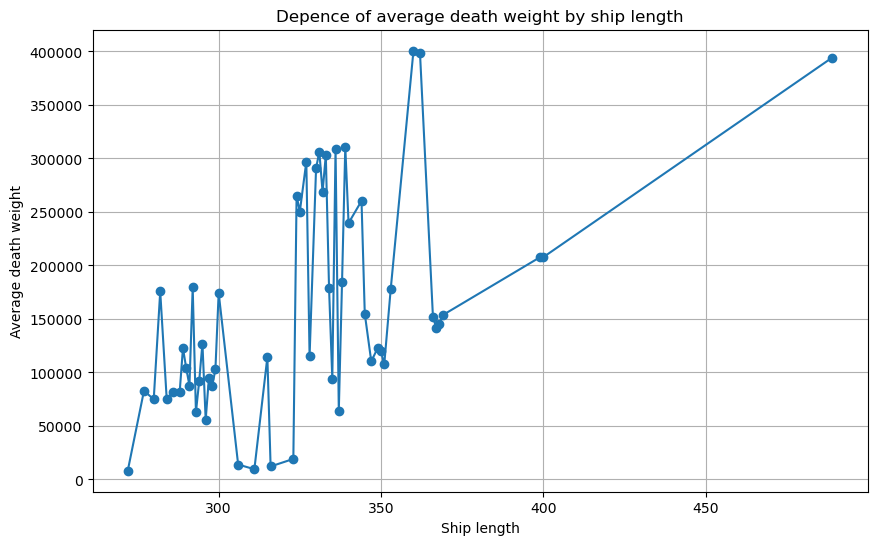

In [5]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    average_max_load = data.groupby('length')['dwt'].mean()
    lengths = average_max_load.index.tolist()
    max_loads = average_max_load.tolist()
    plt.figure(figsize=(10, 6))
    plt.plot(lengths, max_loads, marker='o')
    plt.title('Depence of average death weight by ship length')
    plt.xlabel('Ship length')
    plt.ylabel('Average death weight')
    plt.grid(True)
    plt.show()

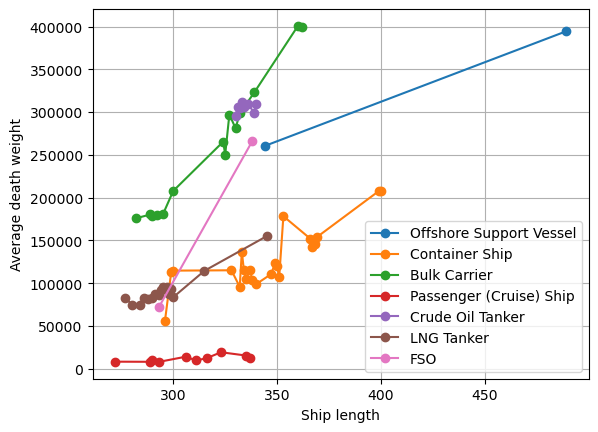

In [6]:
ship_types = data['ship_name'].unique()
for ship_type in ship_types:
    subset = data[data['ship_name'] == ship_type]
    average_max_load = subset.groupby('length')['dwt'].mean()
    lengths = average_max_load.index.tolist()
    max_loads = average_max_load.tolist()
    plt.plot(lengths, max_loads, marker='o', label=ship_type)

plt.xlabel('Ship length')
plt.ylabel('Average death weight')
plt.legend()
plt.grid(True)
plt.show()

# Task 2

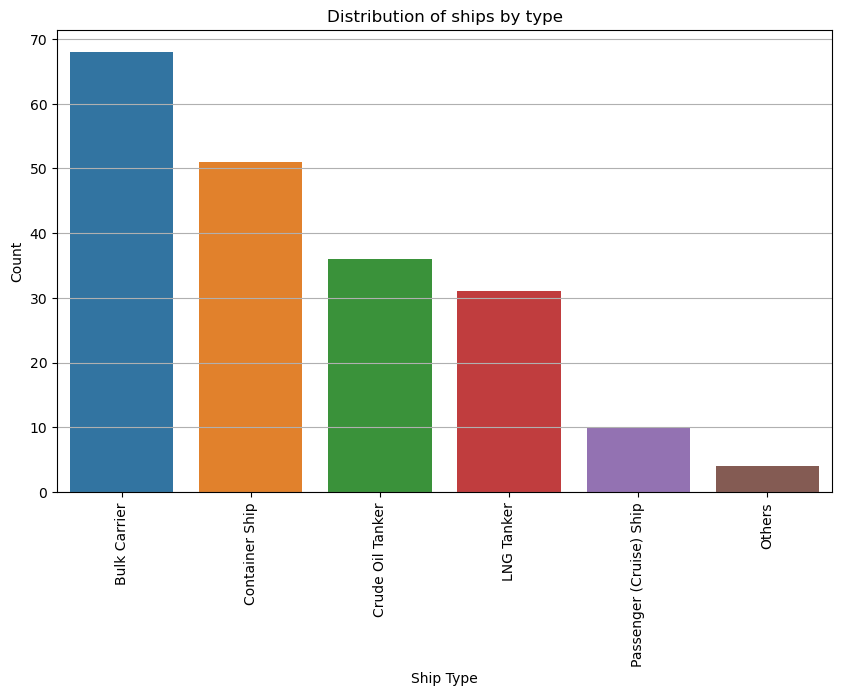

In [7]:
if not is_file_correct and not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    amount_range = 10
    data['ship_name_grouped'] = data['ship_name'].where(data['ship_name'].map(data['ship_name'].value_counts()) >= amount_range, 'Others')
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='ship_name_grouped', order=data['ship_name_grouped'].value_counts().index)
    plt.title('Distribution of ships by type')
    plt.xlabel('Ship Type')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.grid(True, axis='y')
    plt.show()

# Task 3

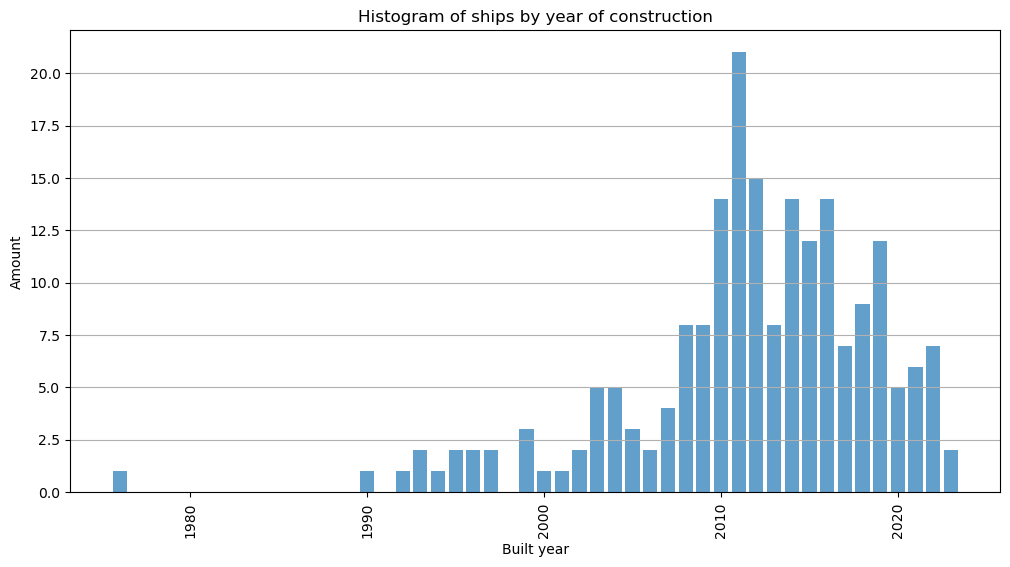

In [8]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    year_counts = data['built_year'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.bar(year_counts.index, year_counts.values, alpha=0.7)
    plt.xlabel('Built year')
    plt.ylabel('Amount')
    plt.title('Histogram of ships by year of construction')
    plt.grid(True, axis='y')
    plt.xticks(rotation=90)
    plt.show()

# Task 4

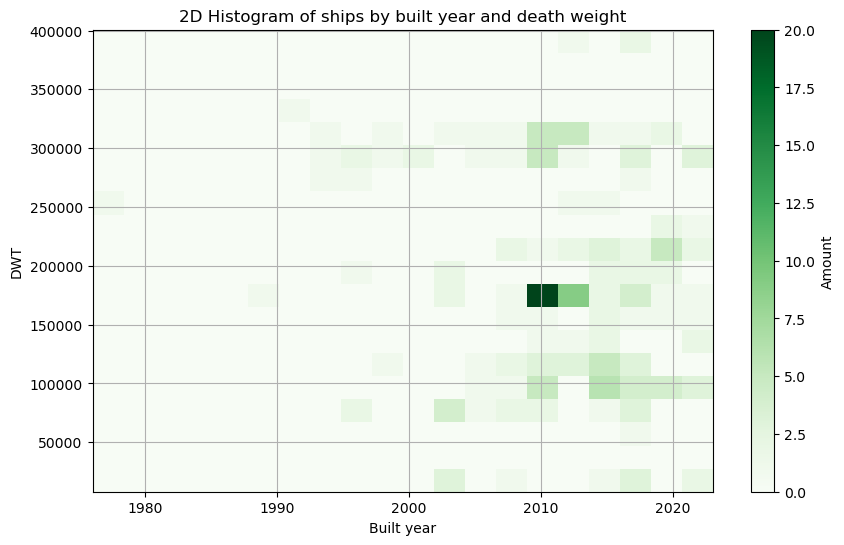

In [9]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    plt.figure(figsize=(10, 6))
    plt.hist2d(data['built_year'], data['dwt'], bins=20, cmap="Greens")
    plt.colorbar(label='Amount')
    plt.title('2D Histogram of ships by built year and death weight')
    plt.xlabel('Built year')
    plt.ylabel('DWT')
    plt.grid(True)
    plt.show()